# Homework 3: Pandas Data Analysis

### <p style="text-align: right;"> &#9989; **Put your name here** </p>

# __CMSE  201 &ndash; Fall 2022__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />



## Learning Goals

* Load data into notebooks using Pandas
* Determine the components of the data
* Make meaningful visual representations of the data
* Draw conclusions from statistical analysis 

___

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, Oct. 28th** 

It should be uploaded into D2L Homework #3.  Submission instructions can be found at the end of the notebook.

## Grading

- Academic integrity statement: 1 pt
- Part 1: Reading, Describing, and Cleaning the Data: 24 pts
- Part 2: Data analysis: 25 pts

**Total:** 50 pts


## Academic integrity statement (1 point)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *Put your personal academic integrity statement here.*

Before we read in the data and begin working with it, let's import the libraries that we would typically use for this task. You can always come back to this cell and import additional libraries that you need.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

## Part 1: Reading, Describing, and Cleaning the Data (22 total points)


Electric Vehicles becomes more and more popular globaly.  [Open EV Charts](https://open-ev-charts.org/) provides a collection of electric car (BEV) registration numbers among different countries, which tracks the adoption of electric cars over time, countries and brands.

## 1.1 Read the data (10 points)

### 1.1.1 A first try (4 points)

&#9989;&nbsp; **Task** Read in the sales data from `EV_Sale.csv` into a DataFrame and print the `.head()` of the data. Then, use `describe` to get a feel of this dataset.

In [51]:
## your code here

In [52]:
### ANSWER ###
# read in file 2 points;  
# head()  1 point;  
# describe 1 point

df0 = pd.read_csv('EV_Sale.csv')
df0.head()

,Country,Year,Month,Total,Volkswagen,Tesla,Renault,Hyundai,BMW,Audi,Opel,Mercedes-Benz,Kia
0,Germany,2017,1,"1,323",114,151,180,29,244,0,13,68,177
1,Germany,2017,2,"1,546",131,202,431,12,168,0,15,61,282
2,Germany,2017,3,"2,191",172,670,587,27,263,0,40,85,97
3,Germany,2017,4,"1,413",197,197,280,73,222,0,3,123,223
4,Germany,2017,5,"1,520",228,322,271,130,201,0,2,46,108


In [53]:
### ANSWER ###
df0.describe()

,Year,Month
count,182.000000,182.000000
mean,2019.692308,6.263736
std,1.506467,3.392664
min,2017.000000,1.000000
25%,2018.000000,3.000000
50%,2020.000000,6.000000
75%,2021.000000,9.000000
max,2022.000000,12.000000


### 1.1.2 Missing data (4 points)

Look at the data file itself and the result you got in Question 1.1.1.

&#9989;&nbsp; **Task** How many columns in the data file and how many columns in the (head and describe) results did you get in 1.1.1?

<font size=8 color="#009600">&#9998;</font> Put your answer here

&#9989;&nbsp; **Task** Check the data types of data you loaded in 1.1.1 (for example, the total registration number of Electric Vehicles in Germany in January 2017). Looking at the original data file, what do you want the data types to be? Do they match your current types?  __2 points__

<font size=8 color="#009600">&#9998;</font> Put your answer here

In [54]:
### ANSWER ###
# There are 13 columns in the data file. There are 13 columns in head, but only 2 columns in describe.
#  __(1 point for data file and 1 point for describe)__
type(df0.loc[0][3])
# Using the above code, we know the loaded data type is 'str', but it should be 'int' or 'float'.
# Some numbers in the data file are surrounded by quotation mark 
# since there are some thousands separators as commas.

str

### 1.1.3 Load data again (2 points)

Load the data correctly.

&#9989;&nbsp; **Task** Check the usage of `read_csv` function, and focus on the parameter `thousands`. Use that parameter to load the data file correctly.

**Hint:** You will have proper number of columns when you `describe` the correctly loaded data.

In [55]:
## your code here

In [56]:
### ANSWER ###
# ?pd.read_csv
df = pd.read_csv('EV_Sale.csv', thousands=',')
#df.head()

df.tail()
df.describe()

,Year,Month,Total,Tesla,Renault,Hyundai,BMW,Audi,Opel,Mercedes-Benz,Kia
count,182.000000,182.000000,182.000000,179.000000,182.000000,182.000000,175.000000,175.000000,177.000000,175.000000,178.000000
mean,2019.692308,6.263736,9821.510989,1310.720670,1329.291209,673.346154,510.948571,448.125714,308.610169,274.622857,372.657303
std,1.506467,3.392664,9587.184349,1907.299974,1470.331093,727.460698,489.005362,555.160199,556.418693,460.220057,289.876031
min,2017.000000,1.000000,1115.000000,4.000000,8.000000,12.000000,81.000000,0.000000,0.000000,0.000000,8.000000
25%,2018.000000,3.000000,3498.250000,182.500000,236.750000,195.000000,198.000000,17.000000,14.000000,1.000000,142.000000
50%,2020.000000,6.000000,5632.000000,455.000000,842.500000,472.000000,322.000000,207.000000,89.000000,52.000000,287.000000
75%,2021.000000,9.000000,12594.500000,1621.000000,1892.250000,699.750000,636.500000,679.500000,251.000000,338.500000,554.000000
max,2022.000000,12.000000,48432.000000,13724.000000,7331.000000,3441.000000,2717.000000,2309.000000,2624.000000,2273.000000,1355.000000


## 1.2 Clean the data (10 points)

### 1.2.1 Remove and track excess data (2 points)

We will only focus on the European motor companies, so we need to remove the excess features that from non-European countries.

&#9989;&nbsp; **Task** Drop the columns that are **NOT** the following:
* Renault
* BMW
* Audi
* Opel
* Mercedes-Benz
* Volkswagen

Make sure to make a list of the columns that you dropped. This is important if you need to report what you didn't consider in the model. Print the `.head()` of the DataFrame after dropping the unneeded columns. 

In [57]:
## your code here

In [58]:
### ANSWER ###
df1 = df.drop(columns = ['Tesla',
       'Hyundai',
       'Kia'])
df1.head()

,Country,Year,Month,Total,Volkswagen,Renault,BMW,Audi,Opel,Mercedes-Benz
0,Germany,2017,1,1323,114,180,244.0,0.0,13.0,68.0
1,Germany,2017,2,1546,131,431,168.0,0.0,15.0,61.0
2,Germany,2017,3,2191,172,587,263.0,0.0,40.0,85.0
3,Germany,2017,4,1413,197,280,222.0,0.0,3.0,123.0
4,Germany,2017,5,1520,228,271,201.0,0.0,2.0,46.0


### 1.2.2 Focus on part of the data (3 points)

Now we just focus on the data on the most recent years, say 2020, 2021 and 2022.

&#9989;&nbsp; **Task** Use a mask to filter your data to focus only on the data from the year 2020 to 2022. Print the `.head()` of that DataFrame. 

In [59]:
## your code here

In [60]:
### ANSWER ###
#  __filtering data 2 points; .head 1 point__
df2 = df1[df1.Year >= 2020]
df2.head()

,Country,Year,Month,Total,Volkswagen,Renault,BMW,Audi,Opel,Mercedes-Benz
36,Germany,2020,1,7491,1713,1798,551.0,572.0,145.0,97.0
37,Germany,2020,2,8154,2245,1352,480.0,591.0,123.0,119.0
38,Germany,2020,3,10329,2363,945,551.0,721.0,715.0,101.0
39,Germany,2020,4,4635,1128,627,290.0,246.0,119.0,26.0
40,Germany,2020,5,5578,1609,896,227.0,583.0,95.0,49.0


### 1.2.3 Missing data (3 points)

Not all the countries have reported values for all items. You should check if any countries have missing data. We could include these missing data in a variety of ways, but instead, to make our work a little simpler, we will simply drop that index / row if it has any missing data.  

&#9989;&nbsp; **Task** Drop any index / row from the data that is missing data.  

In [61]:
## your code here

In [62]:
### ANSWER ###
df3 = df2.dropna()
df3[df3.Country == 'France'].head(20)

,Country,Year,Month,Total,Volkswagen,Renault,BMW,Audi,Opel,Mercedes-Benz
93,France,2020,1,10952,70,5331,137.0,21.0,0.0,21.0
94,France,2020,2,9452,185,3076,153.0,101.0,165.0,37.0
95,France,2020,3,5510,139,1744,98.0,28.0,36.0,18.0
97,France,2020,5,4111,120,1165,122.0,20.0,87.0,10.0
98,France,2020,6,13727,465,6012,249.0,115.0,300.0,38.0
99,France,2020,7,9941,441,3834,195.0,85.0,161.0,24.0
100,France,2020,8,5591,205,1618,93.0,145.0,157.0,27.0
101,France,2020,9,10011,837,2879,178.0,77.0,400.0,78.0
102,France,2020,10,10043,686,3185,168.0,46.0,316.0,24.0
103,France,2020,11,9601,1038,3174,127.0,25.0,222.0,95.0


### 1.2.4 Separate data (2 points)

Separate the current data frame into three separate dataframes according to the countries (Germany, France, and Norway).

&#9989;&nbsp; **Task** Separate the current data frame into three, representing the registration numbers in Germany, France, and Norway.

In [63]:
## your code here

In [64]:
### ANSWER ###
dfG = df3[df3.Country == 'Germany']
dfF = df3[df3.Country == 'France']
dfN = df3[df3.Country == 'Norway']

## 1.3 Describe the data (4 points)

Now that you have a cleaned data set, let's look into the data by making histograms of it.

&#9989;&nbsp; **Task** For one of separated data from Question 1.2.4, make histograms describing the distributions of all the registration numbers. Please describe one histogram in plain English. 


In [65]:
## your code here

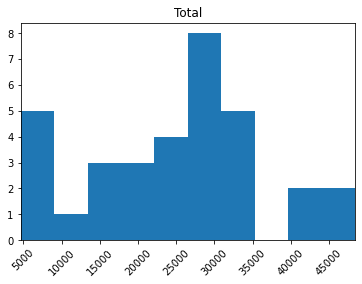

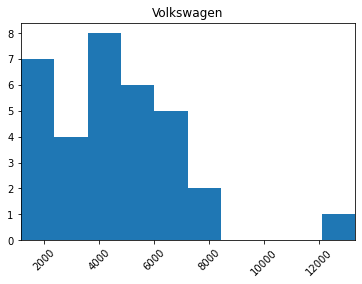

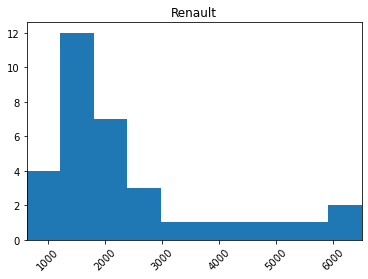

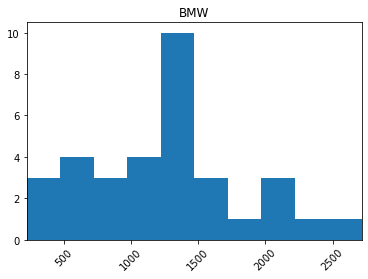

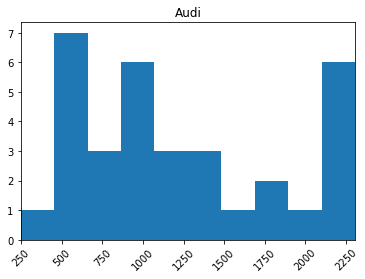

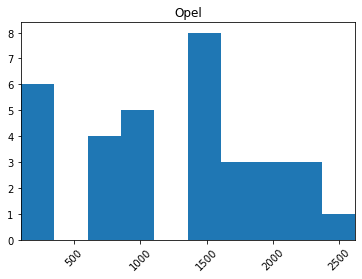

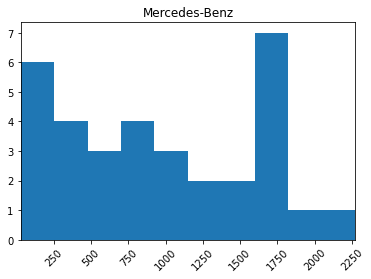

In [66]:
### ANSWER ###
#plot 3 points; 
# description 1 point

col_list = ['Total', 'Volkswagen','Renault', 'BMW', 'Audi', 'Opel', 'Mercedes-Benz']

for item in col_list:
    plt.hist(dfG[item].astype(float))
    plt.xlim(min(dfG[item].astype(float)),max(dfG[item].astype(float)))
    plt.title(item)
    plt.xticks(rotation=45)
    plt.show()
    
# NOTE: They can also make separate plotting commands for each histogram

#dfG[col_list].hist(figsize = (12,12));

# In the first figure, it represents the distribution of monthly registration numbers of all electric cars 
# in Germany from 2020 to 2022.
# In most of the months, the registration number is about 30000.

<font size=8 color="#009600">&#9998;</font> Put your description here

## Part 2: Data analysis (25 total points)

### 2.1 Sales Performance of Renault (12 points)

Renault is a French automobile manufacturer that was among the sales leader of electric cars in Europe. 
As an employee of Renault, you are responsible to monitor the sales performance of your company in France. 
To do so, you will investigate the performance of Renault over the __past four years__.

&#9989;&nbsp; **Task**

Return to the dataframe you loaded in Part 1.1.3. Make sure you have unique variable names! You will first extract the data of France for __2018-2022__ and keep all the brands, __including non-European__.

In [67]:
## your code here

In [68]:
### ANSWER ###

# read in data 1 point; filter France 1 points

df = pd.read_csv('EV_Sale.csv', thousands=',')
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df=df.dropna()

france_data = df.loc['France']
france_data

,Year,Month,Total,Volkswagen,Tesla,Renault,Hyundai,BMW,Audi,Opel,Mercedes-Benz,Kia
Country,,,,,,,,,,,,
France,2018,1,1286,30,12.0,633,42,83.0,0.0,0.0,0.0,136.0
France,2018,2,1949,25,51.0,1155,22,82.0,0.0,0.0,0.0,73.0
France,2018,3,4047,66,241.0,2245,127,152.0,0.0,0.0,0.0,59.0
France,2018,4,1894,48,39.0,961,53,104.0,0.0,0.0,0.0,70.0
France,2018,5,2018,55,112.0,1085,20,117.0,0.0,0.0,0.0,51.0
France,2018,6,3166,53,173.0,1928,21,108.0,0.0,0.0,0.0,18.0
France,2018,7,1734,36,48.0,721,29,111.0,0.0,0.0,0.0,31.0
France,2018,8,1604,30,64.0,810,40,96.0,0.0,0.0,0.0,63.0
France,2018,9,2614,18,171.0,1482,64,107.0,0.0,0.0,0.0,44.0


&#9989;&nbsp; **Task** As a first attempt, create a `scatter` plot of the number of cars sold by Renault in France versus the number of months. Make sure to include appropriate axis labels! 

In [69]:
## your code here

Text(0, 0.5, 'number of cars sold')

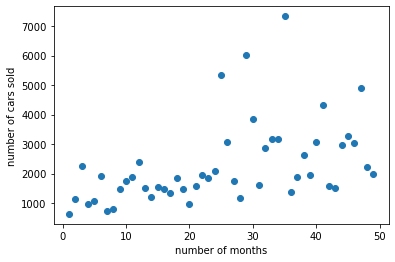

In [70]:
### ANSWER ###
#  __2 points__
nb_month = np.arange(1,len(france_data['Month'])+1,1)
plt.scatter(nb_month,france_data['Renault'])
plt.xlabel('number of months')
plt.ylabel('number of cars sold')

&#9989;&nbsp; **Task** Your boss wants to know if you can monitor Renault sales performace with this plot. Describe why you don't (or do) think it is a useful plot to monitor sales performance.

<font size=6 color="#009600">&#9998;</font> Write your answer here

### ANSWER 
 __2 points__
No we need to have a relative measure (Renault sales/total sales)

&#9989;&nbsp; **Task**  As a second attempt at visualizing information about sales performance, compute the percent of Renault sales in France for each month. Then create a `scatter` plot of the percent of Renault sales versus the number of months. Make sure to incldue appropriate axis labels!

In [71]:
# put your code here

Text(0, 0.5, 'Percent of Renault sales (%)')

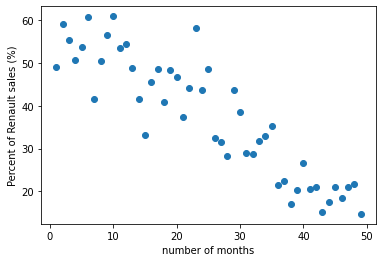

In [72]:
### ANSWER
# __calculate the percentage 2 points; scatter plots 1 point__
percentage_Renault = france_data['Renault']/france_data['Total']*100
plt.scatter(nb_month,percentage_Renault)
plt.xlabel('number of months')
plt.ylabel('Percent of Renault sales (%)')

&#9989;&nbsp; **Task** You have decided that this is a better way to viualize sales performance, but you need to convince your boss. Provide reasoning for how this provides more information about Renault sales performance. How would you describe the sales performance of Renault based on this plot? __3 points__

<font size=6 color="#009600">&#9998;</font> Write your answer here

### ANSWER 
The percent of Renault sales is diminishing of around 40%.

### 2.2 Identifying the Main Competitor (13 points)

Now you have been asked to identify the main competitor of Renault in France (if one exists) to develop a marketing strategy and hopefully increase the percent of sales in 2023.

To do so, you will investigate the percent of sales of all the other brands.

&#9989;&nbsp; **Task** Make multiple `scatter` plots in a single figure (using `plt.subplot()`) that display the percent sales versus the number of months for each brand. Adjust the size of the figure so you can clearly see the plots.Make sure to include appropriate axis labels! 

__Hint__: you should use the matplotlib function `ylim` that sets the $y$-axis range to have a better understanding of the situation. As an example, `plt.ylim([0 0.5])` displays that data with a $y$ value between 0 and 0.5. 

In [73]:
# put your code here

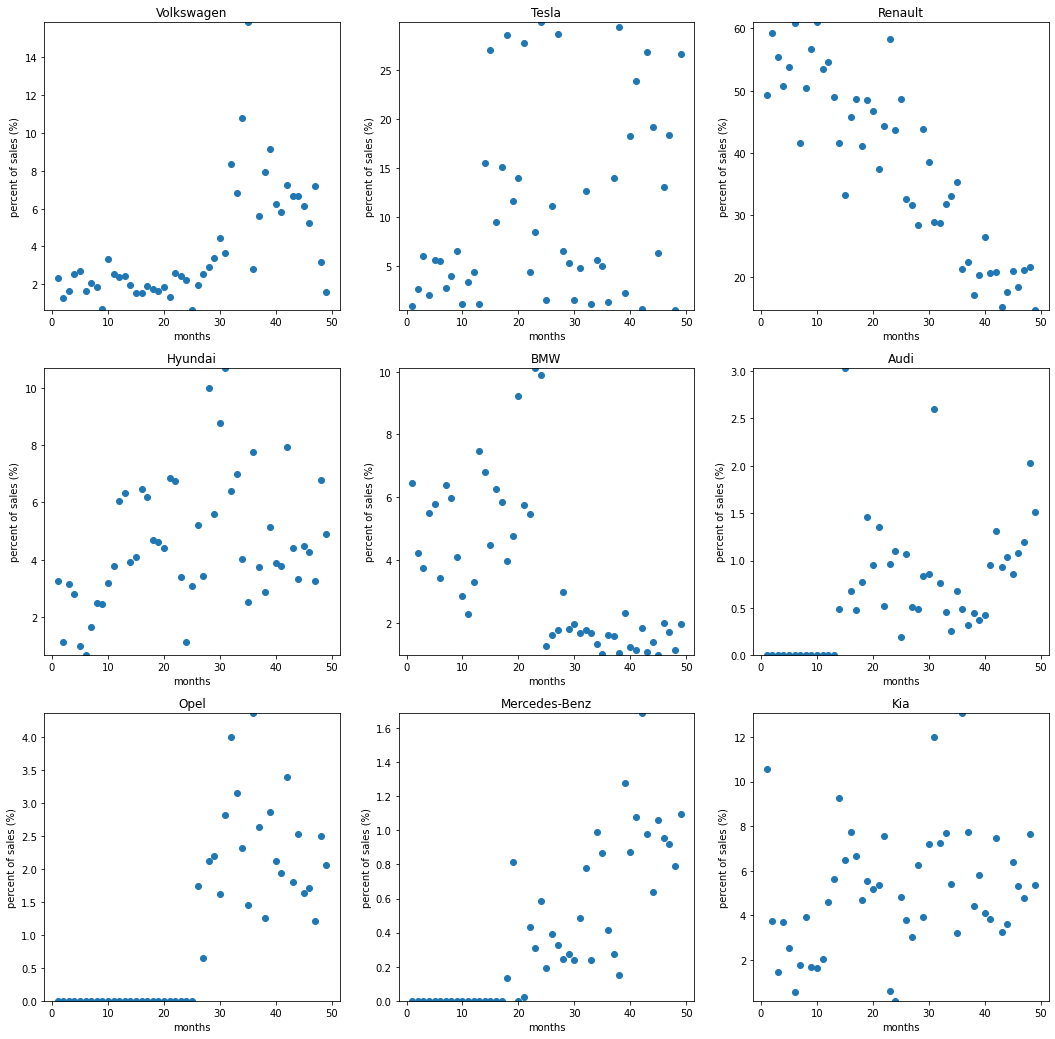

In [74]:
### ANSWER ###
# __scatter plot 3 points; with right ylim 1 point__
nb_brands = 9
columns_name = france_data.columns[3:]

plt.figure(figsize=(18,18))
for i in range(nb_brands):
    plt.subplot(3,3,i+1)
    percent_sales = france_data[columns_name[i]].astype(float)/france_data['Total']*100 # the .astype(float) is just in case some of the new columns cause problems!
    plt.scatter(nb_month,percent_sales)
    plt.title(columns_name[i])
    plt.xlabel('months')
    plt.ylabel('percent of sales (%)')
    plt.ylim([min(percent_sales), max(percent_sales)]) # or plt.ylim([0,100]) depending on what they want to emphasize (either is fine)

&#9989;&nbsp; **Task** As an additional tool to identify your main competitor, you want to know if there is a correlation between the percent sales of Renault and the other brands.

Make multiple `scatter` plots in a single figure (using `plt.subplot()`) that displays the percent of Renault sales versus the percent of all the other brands sales. Adjust the size of the figure so you can clearly see the plots. Include appropropriate axis labels and adjust your axes limits with `ylim`.

In [75]:
# put your answer here

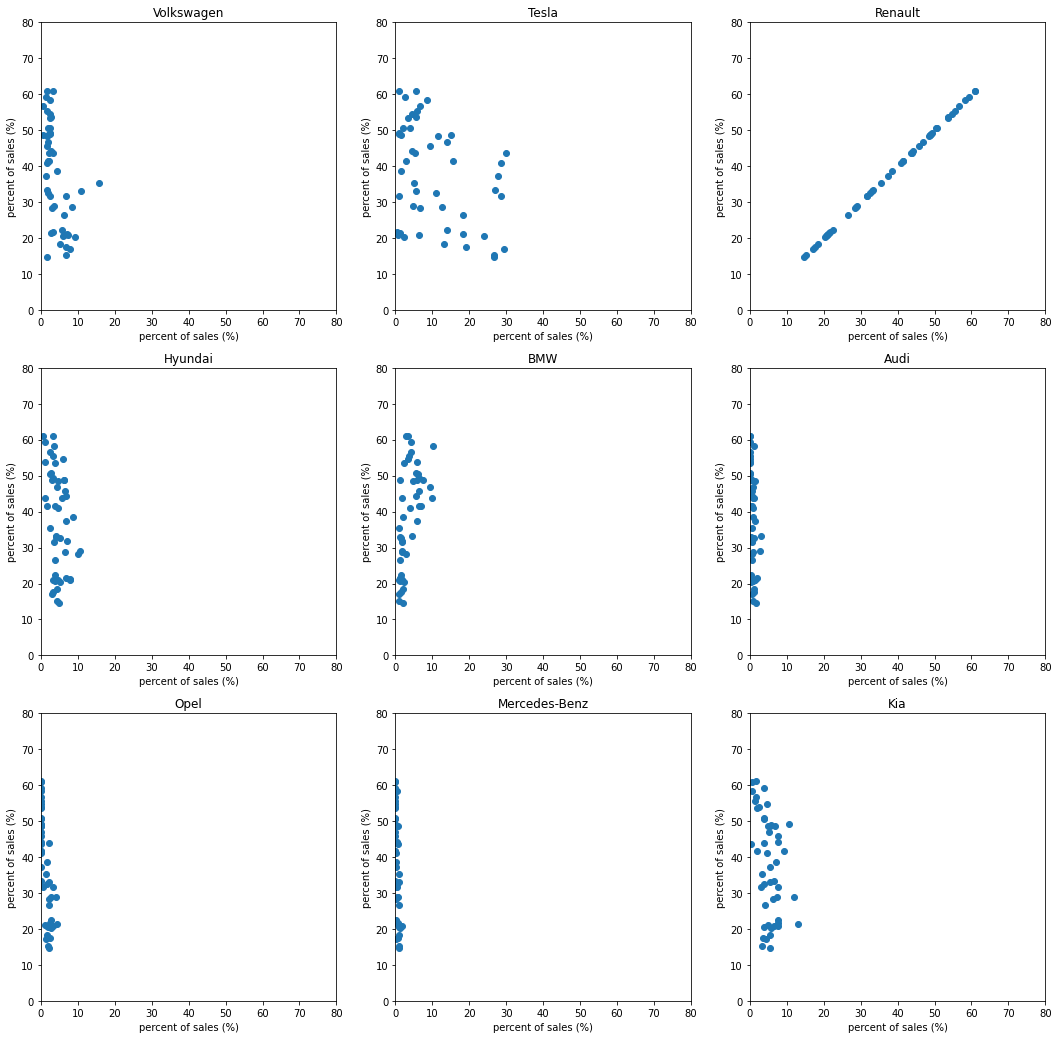

In [76]:
### ANSWER
#  __scatter plots 3 points; proper ylim 1 point; correct title 1 point__
plt.figure(figsize=(18,18))
for i in range(nb_brands):
    plt.subplot(3,3,i+1)
    percent_sales = france_data[columns_name[i]].astype(float)/france_data['Total']*100
    plt.scatter(percent_sales,percentage_Renault)
    plt.title(columns_name[i])
    plt.xlabel('percent of sales (%)')
    plt.ylabel('percent of sales (%)')
    plt.ylim([0,80])
    plt.xlim([0,80])

&#9989;&nbsp; **Task** Using the plots you have made, who is Renault's main competitor in France? Use words and plots to justify your answer!

<font size=6 color="#009600">&#9998;</font> Write your answer here

### ANSWER

 __4 points for any reasonable argument__

It is Tesla primarily because they have the strongest correlation with Renault sales and their sales have been increasing the most recently. Any reasonable explanation that makes use of the plots is acceptable here!

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" section, find the submission folder link for Homework #3, and upload it there.

&#169; Copyright Michigan State University Board of Trustees